In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import logsumexp


In [2]:
mnist_data = pd.read_csv("train.csv")

In [3]:
y = mnist_data.label
X = mnist_data.drop(columns=['label'])
X /= 255 #normalization
np.random.seed(0)

In [4]:
m, n = X.shape

In [12]:
class NeuralNetwork:
    def __init__(self, m, n):
        self.input_size = n
        self.output_size = 10
        self.hidden_size = 10
        
        self.w1 = np.random.rand(self.input_size, self.hidden_size)  # weights and biases for hidden layer
        self.b1 = np.random.rand(1, self.hidden_size)

        self.w2 = np.random.rand(self.hidden_size, self.output_size)  # weigths and biases for output layer
        self.b2 = np.random.rand(1, self.output_size)

        self.z1 = None    # z1: output of hidden layer
        self.z2 = None    # z2: output of output layer

    def relu(self, Z):             # activation function for hidden layer
        return np.maximum(0, Z)

    def softmax(self, Z):          # activation function for output layer
        lse = logsumexp(Z, axis=1, keepdims=True)
        return np.exp(Z - lse)


    # application of forward propagation
    def forward(self, X):                     
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = self.relu(self.z1)                    # a1: activated output of hidden layer
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.softmax(self.z2)                 # a2: activated output of output layer

        self.prediction = self.a2
        return self.prediction
        

    # application of backward propagation
    def backward(self, X, y, lr):
        m = X.shape[0] 
    
        # Gradient of loss wrt output pre-activation z2
        dz2 = self.a2 - y  # shape: (m, output_size)
    
        # Gradients for weights and biases in output layer
        dw2 = np.dot(self.a1.T, dz2)/m  # (hidden_size, output_size)
        db2 = np.sum(dz2, axis=0, keepdims=True)/m  # (1, output_size)
    
        # Backproppagation through second layer to hidden activations
        da1 = np.dot(dz2, self.w2.T)  # (m, hidden_size)
    
        # Backprop through ReLU
        dz1 = da1 * (self.z1 > 0)  # (m, hidden_size)
    
        # Gradients for weights and biases in first layer
        dw1 = np.dot(X.T, dz1)/m  # (input_size, hidden_size)
        db1 = np.sum(dz1, axis=0, keepdims=True)/m  # (1, hidden_size)
    
       
        self.w2 -= lr*dw2
        self.b2 -= lr*db2
        self.w1 -= lr*dw1
        self.b1 -= lr*db1


        

In [13]:

def one_hot_batch(labels, num_classes=10):
    m = labels.shape[0]
    one_hot = np.zeros((m, num_classes))
    one_hot[np.arange(m), labels] = 1
    return one_hot


X = np.array(X)
y = np.array(y)


nn = NeuralNetwork(m=X.shape[0], n=X.shape[1])

# Training loop
epochs = 100
batch_size = 64
learning_rate = 0.05

for epoch in range(epochs):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    # Mini-batch gradient descent
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        y_batch_oh = one_hot_batch(y_batch)

        
        nn.forward(X_batch)
        nn.backward(X_batch, y_batch_oh, learning_rate)


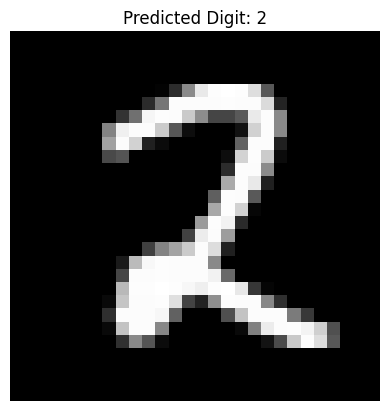

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


test_df = pd.read_csv('test.csv')  
X_test = test_df.to_numpy()

# Select a random sample from test set
random_index = np.random.randint(0, X_test.shape[0])
sample = X_test[random_index].reshape(1, -1)  

# Predict using the trained model
prediction = nn.forward(sample)
predicted_digit = np.argmax(prediction)

# Display the image
plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()
